# Práctica 3: Regresión logística multi-clase y redes neuronales
#### Realizado por Javier Gómez Moraleda y Unai Piris Ibañez

## Parte 1 - Regresión logística multi-clase 

In [20]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.io import loadmat
from sklearn.preprocessing import PolynomialFeatures

### 1. Visualización de los datos

In [21]:
# Carga del fichero
data = loadmat ('ex3data1.mat')
# Se pueden consultar las claves con data.keys()

# Almacenamos los datos leídos en X, y
X = data ['X'] # X es una matriz de 5000x400 donde cada fila representa una imagen de 20x20 píxeles
y = data ['y'] # y es un vector de 5000x1 componentes con las etiquetas de los ejemplos de entrenamiento

(-0.5, 199.5, 19.5, -0.5)

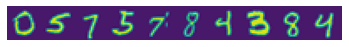

In [22]:
#Selecciona aleatoriamente 10 ejemplos y los pinta
sample = np.random.choice(X.shape[0], 10)
plt.imshow(X[sample, :].reshape( -1, 20).T)
plt.axis('off')

### 2. Clasificación de uno frente a todos

In [23]:
# Calcula el valor de la función sigmoide
def sigmoid(X):
    z = 1/(1 + np.exp(-X))
    return z

In [24]:
# Calcula la función de coste regularizada
def fun_coste_reg(thetas, X, Y, lam):
    H = sigmoid(np.dot(X, thetas))
    m = len(Y)
    Term1 = np.matmul(Y, np.log(H))
    Term2 = np.matmul((1 - Y), np.log(1 - H))
    cost = (- np.sum(Term1 + Term2) / m)  + (lam / (2*m)) * np.sum(np.square(thetas))
    
    return cost

In [25]:
# Calcula el gradiente
def gradient_reg(thetas, X, Y, lam):
    H = sigmoid(np.dot(X, thetas))
    m = len(Y)
    Dif = H - Y
    grad = (np.matmul(Dif, X) / m)  + (lam / m) * thetas

    return grad

In [40]:
def oneVsAll(X, y, num_etiquetas, reg):
    
    ''' oneVsAll entrena varios clasificadores por regresión logística con término
    de regularización 'reg' y devuelve el resultado en una matriz, donde
    la fila i−ésima corresponde al clasificador de la etiqueta i−ésima '''
    
    # Número de columnas y filas
    n = X.shape[1] # 400
    m = len(y) # 5000
    
    y = (y - 1)
        
    y_onehot = np.zeros((m, num_etiquetas))
    
    for i in range(m):
        y_onehot[i][y[i]] = 1
        
    all_thetas = np.zeros((num_etiquetas, n))
    
    for c in range(num_etiquetas):
        theta_inicial = np.zeros(n)
        result = opt.fmin_tnc(func=fun_coste_reg, x0=theta_inicial, fprime=gradient_reg, args=(X, y_onehot[:, c], reg))
        all_thetas[c] = result[0]
        
    return all_thetas

In [44]:
all_thetas = oneVsAll(X, y, 10, 0.1)
print(all_thetas.shape)

(10, 400)


In [61]:
def prediccion(ejemplo, all_thetas):
    resul = sigmoid(np.dot(all_thetas, ejemplo))
    return np.argmax(resul)+1

In [73]:
prediccion(X[599], all_thetas)
predicciones = []

for ejemplo in X:
    predicciones.append(prediccion(ejemplo, all_thetas))

aciertos = 0
for i in range(len(predicciones)): 
    if (predicciones[i] == y[i]):
        aciertos += 1
        
print("Porcentaje de aciertos: ", aciertos/len(predicciones)*100)


Porcentaje de aciertos:  95.88


## Parte 2 - Redes neuronales 